In [52]:
import logging
logging.root.setLevel(logging.INFO)


In [53]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [54]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


class MazeScenario(Scenario):
    
    def __init__(self, exploration_cycles, exploitation_cycles, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = exploration_cycles
        self.exploration_cycles = exploration_cycles
        self.exploitation_cycles = exploitation_cycles
        
        self.steps_array = []
        self.steps = 0

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        return self.state
    
    def switch_to_explitation(self):
        self.remaining_cycles = self.exploitation_cycles
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
            self.reset()
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.state, self.reward, self.done, _

In [55]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(exploration_cycles, exploitation_cycles, input_size)

In [56]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0

In [57]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)
scenario.switch_to_explitation()
model.algorithm.exploration_probability = 0
model.run(scenario, learn=True)

In [58]:
print(len(model))

141


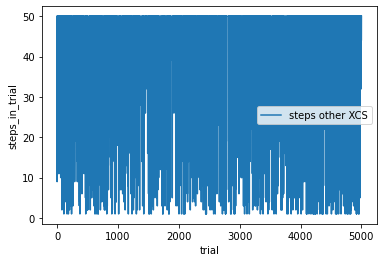

In [59]:
import pandas as pd

df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

In [60]:
from lcs.agents.xcs import Configuration

                    


In [64]:
cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_metrics)

In [65]:
from lcs.agents.xcs import XCS
from utils.xcs_utils import *

agent = XCS(cfg)
my_df = avg_experiment(scenario,
                    cfg,
                    number_of_tests=1,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [1.9707727435520574e-40, 2.1017435550854192e-40, 8.04756327867008e-41, 1.6876066839002829e-40, 1.0758952222964815e-40, 1.3639206587404702e-40, 2.0422392003560976e-40, 1.9141836404663083e-40], 'perf_time': 0.0202622000001611, 'population': 104, 'numerosity': 110}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 8, 'reward': [14.44452928742667, 13.676829830106698, 299.5640442643856, 14.117024530781501, 16.226734978255642, 17.365765950028717, 18.607266627012798, 14.785140572545274], 'perf_time': 0.005866900000000896, 'population': 289, 'numerosity': 522}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 39, 'reward': [45.52789779360006, 10.987326165188584, 168.2542021185231, 18.03318984927256, 14.12756043689592, 11.311121680541177, 12.448563613186872, 11.665438717518684], 'perf_time': 0.030418199999985518, 'population': 289, 'numerosity': 558}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 8, 'reward': [62.233466504604436, 4.4416803956831465, 117.02863675524566, 8.643180287576687, 6.71654823552339, 3.6566148434047534, 7.108556554024889, 9.225819040549275], 'perf_time': 0.005993100000068807, 'population': 289, 'numerosity': 562}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 8, 'reward': [286.27924149507857, 4.17891833

In [67]:
display(my_df)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50,0.020262,104,110
100,9,0.006772,289,484
200,17,0.012090,289,502
300,23,0.017003,289,518
400,8,0.005867,289,522
500,26,0.017597,289,528
600,29,0.021057,289,538
700,29,0.021751,289,548
800,39,0.030418,289,558


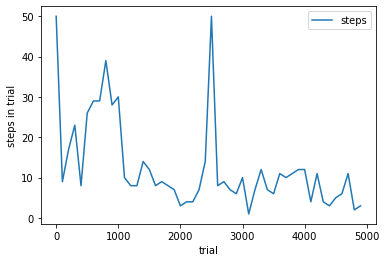

In [66]:
import pandas as pd

ax = my_df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


#### Conclusions
Performing 5000 trial test with default values to my implementation, 400